# Fall 2019 CX4641/CS7641 Homework 2

## Instructor: Dr. Mahdi Roozbahani

## Deadline: Oct 8, Tuesday, 11:59 pm

* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Discussion is encouraged, but each student must write his own answers and explicitly mention any collaborators.

* Homework submission ONLY in .ipynb format.

## Instructions for the assignment

In this assignment, we have both coding and writing questions: you are asked to code and answer them in the cells.

- Graduate students are required to complete all the questions including **bonus parts**. Undergraduate students are welcome to try bonus questions and we will add them on your final grade.

- To switch between cell for code and for markdown, see the menu -> Cell -> Cell Type
    
- You could directly type the Latex equations in the markdown cell.

- Typing with Latex is highly recommended. An image scan copy of handwritten would work if and only if you upload the images to a public cloud or github and refer them within your ipython notebook using the created url.

## 0 Set up
This notebook is tested under [python 3.6.8](https://www.python.org/downloads/release/python-368/), and the corresponding packages can be downloaded from [miniconda](https://docs.conda.io/en/latest/miniconda.html). You may also want to get yourself familiar with several packages:

- [jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/)
- [numpy](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html)
- [matplotlib](https://matplotlib.org/users/pyplot_tutorial.html)

Please implement the functions that has "raise NotImplementedError", and after you finishing the coding, please delete or comment "raise NotImplementedError".

In [1]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

%matplotlib inline  

import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm_notebook as tqdm

print('Version information')

print('python: {}'.format(sys.version))
print('matplotlib: {}'.format(matplotlib.__version__))
print('numpy: {}'.format(np.__version__))

# Set random seed so output is all same
np.random.seed(1)

# url for image in KMeans
url = 'https://zbigatron.com/wp-content/uploads/2019/09/grumpy_cat.jpg'

Version information
python: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
matplotlib: 3.1.0
numpy: 1.16.4


## 1. KMeans Clustering [25 + 5pts]

KMeans is trying to solve the following optimization problem:

\begin{align}
\arg \min_S \sum_{i=1}^K \sum_{x_j \in S_i} ||x_j - \mu_i||^2
\end{align}
where one needs to partition the N observations into K sets: $S = \{S_1, S_2, \ldots, S_K\}$ and each set has $\mu_i$ as its center.




### 1.1 pairwise distance [5pts]

Given $X \in \mathbb{R}^{N x D}$ and $Y \in \mathbb{R}^{M x D}$, obtain the pairwise distance matrix $dist \in \mathbb{R}^{N x M}$ using the euclidean distance metric, where $dist_{i, j} = ||X_i - Y_j||_2$.  

DO NOT USE A FOR LOOP in your implementation -- they are slow and will make your code too slow to pass our grader.  Use array broadcasting instead.

In [2]:
def pairwise_dist(x, y):
    """
    Args:
        x: N x D numpy array
        y: M x D numpy array
    Return:
        dist: N x M array, where dist2[i, j] is the euclidean distance between 
        x[i, :] and y[j, :]
    """
#     raise NotImplementedError
    return np.linalg.norm(x[:,np.newaxis] - y, axis = 2)

In [3]:
# TEST CASE
x = np.random.randn(2, 2)
y = np.random.randn(3, 2)

print("*** Expected Answer ***")
print("""==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]""")


print("\n*** My Answer ***")
print("==x==")
print(x)
print("==y==")
print(y)
print("==dist==")
print(pairwise_dist(x, y))

*** Expected Answer ***
==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]

*** My Answer ***
==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]


### 1.2 KMeans Implementation [20pts]

In this section, you are asked to implement the kmeans algorithm. Below is a template which requires you to implement some member functions that haven't been implemented yet.

For the function signature, please see the corresponding doc strings.

In [4]:
class KMeans(object):

    def __init__(self): #No need to implement
        pass

    def _init_centers(self, points, K, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            kwargs: any additional arguments you want
        Return:
            centers: K x D numpy array, the centers. 
        """
#         raise NotImplementedError
        iniCenters = np.random.choice(points.shape[0], size = K, replace = False)
        return points[iniCenters, :]

    def _update_assignment(self, centers, points):
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            points: NxD numpy array, the observations
        Return:
            cluster_idx: numpy array of length N, the cluster assignment for each point
            
        Hint: You could call pairwise_dist() function.
        """
#         raise NotImplementedError
        return np.argmin(pairwise_dist(points, centers), axis = 1)

    def _update_centers(self, old_centers, cluster_idx, points):
        """
        Args:
            old_centers: old centers KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            centers: new centers, K x D numpy array, where K is the number of clusters, and D is the dimension.
        Note:
            It is possible to have fewer centers after this step.
        """
#         raise NotImplementedError
        newCenters = np.zeros(old_centers.shape)
        for cluster in range(old_centers.shape[0]):
            newCenters[cluster,:] = np.mean(points[cluster_idx == cluster, :], axis = 0)   
        return newCenters

    def _get_loss(self, centers, cluster_idx, points):
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            loss: a single float number, which is the objective function of KMeans. 
        """
#         raise NotImplementedError
        return np.sum(np.linalg.norm(points - (centers[cluster_idx,:]), axis = 1))
        
    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations (Hint: You could change it when debugging)
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            verbose: boolean to set whether method should print loss (Hint: helpful for debugging)
            kwargs: any additional arguments you want
        Return:
            cluster assignments: Nx1 int numpy array
            cluster centers: K x D numpy array, the centers
            loss: final loss value of the objective function of KMeans
        """
        centers = self._init_centers(points, K, **kwargs)
        for it in range(max_iters):
            cluster_idx = self._update_assignment(centers, points)
            centers = self._update_centers(centers, cluster_idx, points)
            loss = self._get_loss(centers, cluster_idx, points)
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            if verbose:
                print('iter %d, loss: %.4f' % (it, loss))
        return cluster_idx, centers, loss

### 1.3 Pixel Clustering

In this section, you will use your K-Means algorithm to do pixel clustering which compresses the image using K colors.

In [5]:
# helper function for plotting images. You don't have to modify it

def plot_images(img_list, title_list, figsize=(11, 6)):
    assert len(img_list) == len(title_list)
    fig, axes = plt.subplots(1, len(title_list), figsize=figsize)
    for i, ax in enumerate(axes):
        ax.imshow(img_list[i] / 255.0)
        ax.set_title(title_list[i])
        ax.axis('off')

In [6]:
# helper function for plotting images. You don't have to modify it

def cluster_pixels_kmeans(image, K):
    """Clusters pixels in the input image
    
    Args:
        image: input image of shape(H, W, 3)
        K: number of clusters
    Return:
        clustered_img: image of shape(H, W, 3) after pixel clustering
    """
    im_height, im_width, im_channel = image.shape
    flat_img = np.reshape(image, [-1, im_channel]).astype(np.float32)
    cluster_ids, centers, loss = KMeans()(flat_img, K)
    kmeans_img = np.reshape(centers[cluster_ids], (im_height, im_width, im_channel))
    return kmeans_img

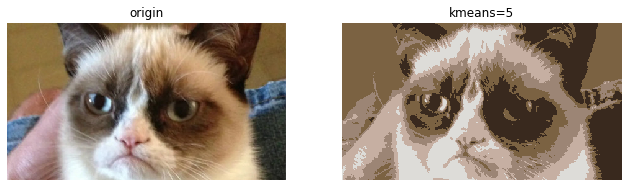

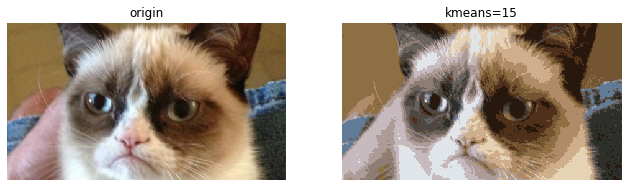

In [7]:
# helper function for plotting images. You don't have to modify it

image = imageio.imread(imageio.core.urlopen(url).read())

kmeans_image_5 = cluster_pixels_kmeans(image, 5)
plot_images([image, kmeans_image_5], ['origin', 'kmeans=5'])

kmeans_image_15 = cluster_pixels_kmeans(image, 15)
plot_images([image, kmeans_image_15], ['origin', 'kmeans=15'])

### 1.4 (Bonus) Find the optimal number of clusters [5pts]

You will now use the elbow method to find the optimal number of clusters to use for pixel clustering the given image.

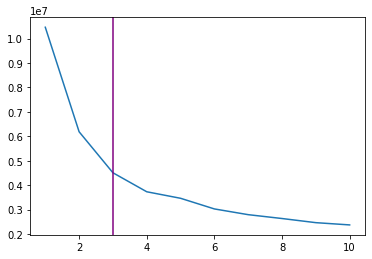

In [14]:
def find_optimal_num_clusters(image, max_K=10):
    """Plots loss values for different number of clusters in K-Means
    
    Args:
        image: input image of shape(H, W, 3)
        max_K: number of clusters
    Return:
        None (plot loss values against number of clusters)
    """
#     raise NotImplementedError
    losses = []
    clusters = []
    im_height, im_width, im_channel = image.shape
    flat_img = np.reshape(image, [-1, im_channel]).astype(np.float32)
    for k in range(1,max_K+1):    
        cluster_ids, centers, loss = KMeans()(flat_img, k)
        losses.append(loss)
        clusters.append(k)
    plt.plot(clusters, losses)
    plt.axvline(3, color = 'purple')

find_optimal_num_clusters(image)

## 2 EM algorithm [20 pts]

EM algorithm is a widely used approach to learning in the presence of unobserved variables. Consider the general framework of the EM alogrithm, given a joint distribution $P(x,z|\theta)$ over observed variables $x$, hidden variable $z$ and its distribution $q(z)$, and governing parameter $\theta$, the goal is to maximize the likelihbood function $P(x|\theta)$ and given the following expression:
    
$$\log P(x|\theta) = \log (\sum_{z}P(x, z|\theta)) = \log (\sum_{z}q(z)\frac{P(x, z|\theta)}{q(z)}) \geq \sum_{z}q(z) \log \frac{P(x, z|\theta)}{q(z)} = \sum_{z}q(z) \log \frac{P(z|x, \theta)P(x|\theta)}{q(z)}$$

The inequality is based on the Jensen's therom.

- Please provide a brief description on how to perform the $E$ step in the above equation.
- Please provide a brief description on how to perform the $M$ step in the above equation.

Suppose

$$F(q,\theta) = \sum_{z}q(z) \log \frac{P(x, z|\theta)}{q(z)}$$

During the lecture, the expression $\sum_{z}q(z) \log \frac{P(x, z|\theta)}{q(z)}$ was explained through the sum of entropy and log-likelihood; the same approach can also be explained using KL-divergence. 

- Please derive that from the above equation (**Hint**: use product rule for joint probability) and explain the what will happen to the KL term in the $E$ step.

## 3. GMM implementation [30 pts]

GMM is trying to do MLE (maximum likelihood estimation). It approximates the distribution of data using a set of gaussian distributions. Here we assume that each gaussian component has diagonal covariance matrix, which makes it easier to calculate the density. 

Given $N$ samples $X = [x_1, x_2, \ldots, x_N]$, we are asked to find $K$ diagonal gaussian distributions to model the data $X$: 

\begin{align}
    \max_{\{\mu_k, \sigma_k\}_{k=1}^K} \sum_{i=1}^N \log \big( \sum_{k=1}^{K} \pi(k) \mathcal{N}(x_i | \mu_k, \sigma_k)\big)
\end{align}

- For undergaduate student: you may assume the covariance matrix is diag matrix, which means the features are independent. (i.e. the red intensity of a pixel is independent from its blue intensity, etc). 
- For graduate student: please assume full covariance matrix.

**Hints**

1. Here $\pi(\cdot)$ is the prior of the latent variable. It is also called the mixture coefficient. To make it simple, we assume $\pi(k) = \frac{1}{K}, \forall k = 1, 2, \ldots, K$.

2. As we create our model, we will need to use a multivariate Gaussian since our pixels are 3-dimensional vectors corresponding to red, green, and blue color intensities.  It means that for each image, you need to convert it into a N*3 matrix, where N is the number of pixels, and 3 is the number of features.

The following example from a machine learning textbook may be helpful:

3. In this question, each pixel has three features, which are R, G, and B.

4. At EM steps, gamma means $\tau\left(z_{n k}\right)$ at our slide of GMM, which is called the responsibility. If we have K components, each data point (pixel) will have K responsibility values.

5. For E steps, we already get the log-likelihood at ll_joint() function. For the fomula at our slide:
$$
\tau\left(z_{n k}\right)=\frac{\pi_{k} N\left(x_{n} | \mu_{k}, \Sigma_{k}\right)}{\sum_{j=1}^{K} \pi_{j} N\left(x_{n} | \mu_{j}, \Sigma_{j}\right)},
$$
ll_joint equals to the $N$ here. Thus, You should be able to finish E steps with just a few lines of code by using ll_joint() and softmax() defined above.

## 3.1 Helper functions

### softmax [5 pts]

Given $logit \in \mathbb{R}^{N x D}$, calculate $prob \in \mathbb{R}^{N x D}$, where $prob_{i, j} = \frac{\exp(logit_{i, j})}{\sum_{k=1}^D exp(logit_{i, k})}$.

Note that it is possible that $logit_{i, j}$ is very large, making $\exp(\cdot)$ of it to explode. To make sure it is numerical stable, you may need to subtract the maximum for each row of $logits$.  As in calculating pairwise distances, DO NOT USE A FOR LOOP.

In [9]:
def softmax(logits):
    """
    Args:
        logits: N x D numpy array
    """
#     raise NotImplementedError
    filteredLogits = logits - np.max(logits, axis=-1, keepdims=True)
    numerator = np.exp(filteredLogits)
    denomSummation = np.sum(numerator, axis=-1, keepdims=True)
    
    return numerator/denomSummation
    
logits = np.array([[1000, 1000], 
                   [1, 2]], dtype=np.float32)
print("""Correct answer:
===softmax===
[[0.5        0.5       ]
 [0.26894143 0.7310586 ]]""")

print("My answer:")
print(softmax(logits))

Correct answer:
===softmax===
[[0.5        0.5       ]
 [0.26894143 0.7310586 ]]
My answer:
[[0.5        0.5       ]
 [0.26894143 0.7310586 ]]


### logsumexp [5 pts]

Given $logit \in \mathbb{R}^{N x D}$, calculate $s \in \mathbb{R}^N$, where $s_i = \log \big( \sum_{j=1}^D \exp(logit_{i, j}) \big)$. Again, pay attention to the numerical problem. You may want to use similar trick as in the softmax function.  DO NOT USE A FOR LOOP.

In [15]:
def logsumexp(logits):
    """
    Args:
        logits: N x D numpy array
    Return:
        s: N x 1 array where s[i,0] = logsumexp(logits[i,:])
    """
#     raise NotImplementedError
    filteredLogits = logits - np.max(logits, axis=-1, keepdims=True)
    exponent = np.exp(filteredLogits)
    summation = np.sum(exponent, axis=-1, keepdims=True)
    maxs = np.max(logits, axis=-1, keepdims=True)
    return np.log(summation) + maxs


logits = np.array([[1000, 1000], 
                   [1, 2]], dtype=np.float32)
print("""Correct Answer:
===logsumexp===
[[1000.6932   ]
 [   2.3132617]]""")

print("My answer: ")
print(logsumexp(logits))

Correct Answer:
===logsumexp===
[[1000.6932   ]
 [   2.3132617]]
My answer: 
[[1000.6932   ]
 [   2.3132617]]


## 3.2 GMM Implementations [20pts]

In [21]:
class GMM(object):
    def __init__(self): # No need to implement
        pass
        
    def _init_components(self, points, K, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            K: number of components
            kwargs: any other args you want
        Return:
            pi: numpy array of length K, prior
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the covariance matrix of each gaussian.
            
        Hint: You could use the K-means results to initial GMM. It will help to converge. 
        For instance, you could use ids, mu = KMeans()(points, K)  to initialize.
        """
#         raise NotImplementedError
        ids, mu, loss = KMeans()(points, K)
        pi = np.full(K, 1/K)
        sigma = np.zeros((K, points.shape[1], points.shape[1]))
        for k in range(K):
            sigma[k] = np.matmul((points - mu[k]).T, points - mu[k])
            
        return pi, mu, sigma

    def _ll_joint(self, points, pi, mu, sigma, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the covariance matrix of each gaussian.
        Return:
            ll(log-likelihood): NxK array
        """
#         raise NotImplementedError
        lljoint = np.zeros((points.shape[0], len(pi)))
        for j in range(0,mu.shape[0]):       
            log_pi = np.log(pi[j])
            
            gausfraction = 1/np.sqrt(((2*np.pi)**points.shape[1])*np.linalg.det(sigma[j]))
        
            diff = points-mu[j]
            expDivision = np.matmul(diff, np.linalg.pinv(sigma[j]))
            gausE = np.exp(-0.5*(np.diag(np.matmul(expDivision, diff.T))))
            
            log_gauss = np.log(gausfraction * gausE)
            lljoint[:,j] = (log_pi + log_gauss)[:]
        
        return lljoint

    def _E_step(self, points, pi, mu, sigma, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the covariance matrix of each gaussian.
        Return:
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            
        Hint: You should be able to do this with just a few lines of code by using _ll_joint() and softmax() defined above. 
        """
#         raise NotImplementedError
        return softmax(self._ll_joint(points,pi,mu,sigma))

    def _M_step(self, points, gamma, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
        Return:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxDxD numpy array, the covariance matrix of each gaussian.
            
        Hint:  There are formulas in the slide.
        """
#         raise NotImplementedError
        N = points.shape[0]
        D = points.shape[1]
        K = gamma.shape[1]
        
        pi = np.zeros(K)
        mu = np.zeros((K, D))
        sigma = np.zeros((K,D,D))
        
        for k in range(K):
            m_c = np.sum(gamma[:,k],axis=0)
            
            #Update Pi
            pi[k] = m_c/N
           
            #Update Mu
            mu[k] = np.dot(gamma[:,k],points)/m_c
            
            #Update Sigma
            gamNK = gamma[:,k]
            diff = points - mu[k]
            summation = np.matmul(diff.T, diff * gamNK[:,np.newaxis])
            sigma[k] = summation/m_c
        
        return pi,mu,sigma

    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            kwargs: any additional arguments you want
        Return:
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            (pi, mu, sigma): (1xK np array, KxD numpy array, KxD numpy array), mu and sigma.
        
        Hint: You do not need to change it. For each iteration, we process E and M steps, then 
        """        
        pi, mu, sigma = self._init_components(points, K, **kwargs)
        pbar = tqdm(range(max_iters))
        for it in pbar:
            # E-step
            gamma = self._E_step(points, pi, mu, sigma)
            
            # M-step
            pi, mu, sigma = self._M_step(points, gamma)
            
            # calculate the negative log-likelihood of observation
            joint_ll = self._ll_joint(points, pi, mu, sigma)
            loss = -np.sum(logsumexp(joint_ll))
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            pbar.set_description('iter %d, loss: %.4f' % (it, loss))
        return gamma, (pi, mu, sigma)

In this section, you will use your GMM algorithm to do pixel clustering.

In [17]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

%matplotlib inline  

import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm_notebook as tqdm

def plot_scatter(samples, ids):
    colors = np.zeros((len(ids), 3))
    choices = [[0, 0, 1], [0, 1, 0], [1, 0, 0]]
    num_points = []
    for i in range(3):
        num_points.append(np.sum(ids == i))
    maps = np.argsort(num_points)
    for i in range(3):
        colors[np.where(ids == maps[i]), :] = choices[i]
    plt.scatter(samples[:, 0], samples[:, 1], s=1, color=colors)
    plt.axis('equal')

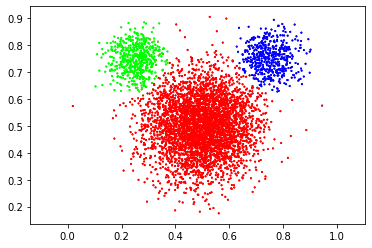

In [22]:
def gmm_sampling(num_samples, pi, mu, sigma):
    """
    Args:
        num_samples: number of samples required
        pi: np array of length K, the prior distribution, where K is # components
        mu: KxD np array, the center for each gaussian, where D is data dimension
        sigma: KxDxD np array, the standard deviation cov for each gaussian
    Return:
        samples: NxD np array, the result samples
        ids: np array of length N, the component id for each sample
    """    
    # obtain the shapes
    K = mu.shape[0]  # nb of components (pi)
    D = mu.shape[1]  # data dimension
    N = num_samples

    samples = np.zeros((N,D))
    ids = np.zeros(N)

    for i in range(0,N):
        # choose component
        r = np.random.uniform(0,1)
        if r <= pi[0]:
            index = 0
        elif r <= pi[0]+pi[1]:
            index = 1
        else:
            index = 2
        ids[i] = index

        # sample from Gaussian
        mean = mu[index,:]
        cov = sigma[index,:]**2
        samples[i,:] = np.random.multivariate_normal(mean, cov)

    return samples,ids

pi = np.array([0.8, 0.1, 0.1])
mu = np.array([[0.5, 0.5], 
               [0.25, 0.75], 
               [0.75, 0.75]], dtype=np.float32)
sigma = np.array(
    [
        [[0.1, 0.01],
        [0.01, 0.1]],
#         
        [[0.05, 0.01],
        [0.01, 0.05]],
        
        [[0.05, 0.],
        [0., 0.05]]            
    ],)

samples, ids = gmm_sampling(5000, pi, mu, sigma)
plot_scatter(samples, ids)
gamma, (pi, mu, sigma) = GMM()(samples, K=3, max_iters=100)
ids = np.argmax(gamma, axis=1)
plot_scatter(samples, ids)

## 4 Lagrangian [25 + 5 pts]

Assume in a coordinate $(\theta_1,\theta_2)$ as shown in the image below, for any line that has a slope $ k = 0.5 $, just as the blue lines in this image, we want to find the possible minimum $\theta_2$-intercept of this line. Without a constraint, this minimum $\theta_2$-intercept can go to negative infinity (We just keep moving this line downward). However, if a constraint is added, which requires that this line has to fall on the red ellipse (Analytical form of this area is $\frac{\theta_1^2}{2^2} + \frac{\theta_2^2}{1^2} \leq 1 $), this question will have a unique, bounded solution.

<img src="https://www.dropbox.com/s/ujp3yg7d6tpn0xa/Picture3.png?raw=1" width=700px; />

The above question can be mathmatically formulated as a constrained optimization problem:

$$ \underset{\theta_1,\theta_2}{\text{min   }} f(\theta_1,\theta_2), \quad where \, f(\theta_1,\theta_2) = \theta_1 + 2 \theta_2 $$

$$ \underset{\theta_1,\theta_2}{\text{subject to   }} g(\theta_1,\theta_2) \leq 0, \quad where \, g(x) = \theta_1^2+4 \theta_2^2-4 $$

### 4.1 Write out the Lagrangian function. [5pts]

The Primal problem and the Dual problem are defined as,

Primal problem (The original optimization problem.) : $$ \underset{\theta_1,\theta_2}{\text{min   }} \theta_{\mathcal{P}}(\theta_1,\theta_2) = \underset{\theta_1,\theta_2}{\text{min   }} \underset{\lambda \geq 0}{\text{max   }} f(\theta_1,\theta_2) + \lambda (\theta_1^2 + 4 \theta_2^2 - 4)$$

Dual problem (By shifting the order of $min$ and $max$ in the Primal problem.) : $$ \underset{\lambda \geq 0}{\text{max   }} \theta_{\mathcal{D}}(\lambda) = \underset{\lambda \geq 0}{\text{max   }} \underset{\theta_1,\theta_2}{\text{min   }} f(\theta_1,\theta_2) + \lambda (\theta_1^2 + 4 \theta_2^2 - 4) $$

For this problem, the optimal solution to the Primal and the Dual problems are the same, which is often referred as strong duality. The optimal solution can be found out by meeting the KKT condition.

### 4.2 Write out the KKT conditions of the Lagrangian defined in 4.1. [10 pts]

KKT conditions include:

(1). $ \nabla_{\theta_1,\theta_2} \mathcal{L} = 0 $. (Satisfied at the minimum of $f$.)


(2). $ \lambda g(\theta_1,\theta_2) = 0 $. and (3). $ \lambda \geq 0 $. (Therefore, when this condition is met, $ \mathcal{L} = f $.)


(3). $ g(\theta_1,\theta_2) \leq 0 $. (The inequality constraint.)

### 4.3 Solve the optimization problem. [10pts]
(**Hint**: The optimal solution can be found either by solving the KKT conditions or by solving the Dual problem.)

### 4.4 Bonus [5 pts]
Will the solution be the same if an equality constraint
$$ \frac{\theta_1^2}{2^2}+\frac{\theta_2^2}{1^2} = 1 $$
is applied on this question? (The constraint is as shown in the picture below)

Please prove it mathematically.